In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Latex
from sympy import * 
from iminuit import Minuit
import seaborn as sns
import pandas as pd
import scipy as sp
import sys                                             # Modules to see files and folders in directories
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression,nice_string_output, add_text_to_ax
from scipy.stats import binom, poisson, norm
from Rolling_ball_functions import data_sorting,data_import,mean_func
from Universal_functions import weighted_mean,uncertainty_weighted,fit_multiple

In [3]:
def fit_function_Lin(x,v0,slope,intersection):
    return v0*x+ 1/2*slope*x**2 +intersection

In [12]:
def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    from IPython.core.display import Latex
    from sympy import * 
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    return display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [13]:
Data=pd.read_csv("../data/data_setup.csv")

In [14]:
Tea=np.arcsin(weighted_mean(Data.height.dropna(),Data.height_std.dropna())/np.sqrt(weighted_mean(Data.height.dropna(),Data.height_std.dropna())**2+weighted_mean(Data.length.dropna(),Data.length_std.dropna())**2))*180/np.pi

In [54]:
Laser_1=weighted_mean(np.array(Data.laser_1.dropna()),np.array(Data.laser_1_std.dropna()))*10**(-2)
Laser_2=weighted_mean(np.array(Data.laser_2.dropna()),np.array(Data.laser_2_std.dropna()))*10**(-2)
Laser_3=weighted_mean(np.array(Data.laser_3.dropna()),np.array(Data.laser_3_std.dropna()))*10**(-2)
Laser_4=weighted_mean(np.array(Data.laser_4.dropna()),np.array(Data.laser_4_std.dropna())) *10**(-2)
Laser_1_std=uncertainty_weighted(np.array(Data.laser_1_std.dropna()))*10**(-2)
Laser_2_std=uncertainty_weighted(np.array(Data.laser_2_std.dropna()))*10**(-2)
Laser_3_std=uncertainty_weighted(np.array(Data.laser_3_std.dropna()))*10**(-2)
Laser_4_std=uncertainty_weighted(np.array(Data.laser_4_std.dropna()))*10**(-2)
Length_slope=np.array([0.0001,Laser_1,Laser_2,Laser_3,Laser_4])
Length_slope_std=np.array([0.1,Laser_1_std,Laser_2_std,Laser_3_std,Laser_4_std])


In [55]:
Number_of_datasets=5
skiprows_pd=15
location="../data/slope/"


In [57]:

diffs = Length_slope - np.roll(Length_slope, 1)
diffs[0] = 0
diffs[1:] = np.flipud(diffs[1:])
Length_slope = np.cumsum(diffs)

In [58]:


Time_big,Voltages_big=data_import(5,"exported_data_big_ball_acc_",15,location)
Time_small,Voltages_small=data_import(5,"exported_data_acc_small_ball_",15,location)
Time_big_180,Voltages_big_180=data_import(5,"exported_data_acc_small_180_deg_",15,location)
Time_small_180,Voltages_small_180=data_import(5,"exported_data_acc_big_ball_180_deg_",15,location)


In [59]:
Delta_T_big,Delta_T_big_std=mean_func(Time_big,Voltages_big)
Delta_T_small,Delta_T_small_std=mean_func(Time_small,Voltages_small)
Delta_T_big_180,Delta_T_big_180_std=mean_func(Time_big_180,Voltages_big_180)
Delta_T_small_180,Delta_T_small_180_std=mean_func(Time_small_180,Voltages_small_180)

In [60]:
chi2_object_big = Chi2Regression(fit_function_Lin, Delta_T_big,Length_slope, Length_slope_std) 
minuitLin_big= Minuit(chi2_object_big, pedantic=False, intersection=1, slope=1,v0=1 ,print_level=0) 
minuitLin_big.migrad();

In [61]:
chi2_object_small = Chi2Regression(fit_function_Lin,Delta_T_small,Length_slope, Length_slope_std) 
minuitLin_small= Minuit(chi2_object_small, pedantic=False, intersection=1, slope=1,v0=1, print_level=0) 
minuitLin_small.migrad();

In [62]:
chi2_object_big_180 = Chi2Regression(fit_function_Lin, Delta_T_big_180,Length_slope, Length_slope_std) 
minuitLin_big_180= Minuit(chi2_object_big_180, pedantic=False, intersection=1, slope=1,v0=1, print_level=0) 
minuitLin_big_180.migrad();

In [63]:
chi2_object_small_180 = Chi2Regression(fit_function_Lin,Delta_T_small_180,Length_slope, Length_slope_std) 
minuitLin_small_180= Minuit(chi2_object_small_180, pedantic=False, intersection=1, slope=1,v0=1, print_level=0) 
minuitLin_small_180.migrad();

In [64]:
x=np.linspace(0,0.64,100)

0.0


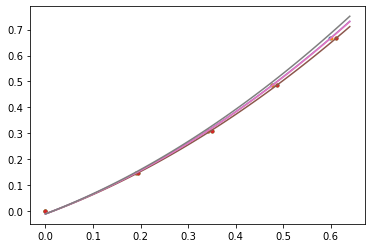

In [65]:
print(Delta_T_big[0])
plt.plot(Delta_T_big,Length_slope,'.')
plt.plot(Delta_T_big_180,Length_slope,'.')
plt.plot(Delta_T_small,Length_slope,'.')
plt.plot(Delta_T_small,Length_slope,'.')
plt.plot(x,fit_function_Lin(x,minuitLin_big.args[0],minuitLin_big.args[1],minuitLin_big.args[2]))
plt.plot(x,fit_function_Lin(x,minuitLin_small.args[0],minuitLin_small.args[1],minuitLin_big.args[2]))
plt.plot(x,fit_function_Lin(x,minuitLin_big_180.args[0],minuitLin_big_180.args[1],minuitLin_big.args[2]))
plt.plot(x,fit_function_Lin(x,minuitLin_small_180.args[0],minuitLin_small_180.args[1],minuitLin_big.args[2]))

In [66]:
g,a,DB,DR,T1,T2= symbols("g,a,D_{ball},D_{rail},theta,theta_Delta")
dDB,dDr,dT,dTd,da,dg= symbols("sigma_DB, sigma_Dr, sigma_theta, sigma_Delta ,sigma_a,sigma_g")

In [67]:
g=a/( T1 + T2 )*((1)+(2/5)*DB**2/(DB**2-DR**2))
dg=sqrt((da*g.diff(a))**2+(g.diff(DB)*dDB)**2+(g.diff(dDr)*dDr)**2+(g.diff(T1)*dT)**2+(g.diff(T2)*dTd)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('sigma_g'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## weigthed_ball_sections

In [68]:
big_ball=weighted_mean(np.array(Data.big_ball.dropna()),np.array(Data.big_ball_std.dropna()))*10**(-3)
small_ball=weighted_mean(np.array(Data.small_ball.dropna()),np.array(Data.small_all_std.dropna()))*10**(-3)
big_ball_std=uncertainty_weighted(np.array(Data.big_ball_std.dropna()))*10**(-3)
small_ball_std=uncertainty_weighted(np.array(Data.small_all_std.dropna()))*10**(-3)

## weighted_Angle

In [69]:
angle=weighted_mean(np.array(Data.angle .dropna()),np.array(Data.angle_std.dropna()))
angle_180 =weighted_mean(np.array(Data.angle_180.dropna()),np.array(Data.angle_180_std.dropna()))
angle_std=uncertainty_weighted(np.array(Data.angle_std.dropna()))
angle_180_std=uncertainty_weighted(np.array(Data.angle_180_std.dropna()))

## d_rail

In [70]:
d_rail=weighted_mean(np.array(Data.d_rail.dropna()),np.array(Data.d_rail_std.dropna()))*10**(-3)
d_rail_std=uncertainty_weighted(Data.d_rail_std)*10**(-3)

In [71]:
deltaT=(angle_180-angle)/2
angle
angle_180

13.459999999999999

## distance Ramp weighted  Lasers

In [72]:
print(minuitLin_big.args[1]/np.sin((Tea+deltaT)*np.pi/180)*(1+2/5*big_ball**2/(big_ball**2-d_rail**2)))
print(minuitLin_big_180.args[1]/np.sin((Tea-deltaT)*np.pi/180)*(1+2/5*big_ball**2/(big_ball**2-d_rail**2)))
print(minuitLin_small.args[1]/np.sin((Tea+deltaT)*np.pi/180)*(1+2/5*small_ball**2/(small_ball**2-d_rail**2)))
print(minuitLin_small_180.args[1]/np.sin((Tea-deltaT)*np.pi/180)*(1+2/5*small_ball**2/(small_ball**2-d_rail**2)))

8.907357136458716
9.191080172070272
8.82185533957992
9.857971397043746


In [73]:
print((angle-angle_180)/2)
print(angle)
Tea

-0.22999999999999954
13.0


13.76394697616326

In [36]:
g,a,DB,DR,T1,T2= symbols("g,a,D_{ball},D_{rail},theta,theta_Delta")
dDB,dDr,dT,da,dg= symbols("sigma_DB, sigma_Dr, sigma_theta,sigma_a,sigma_g")

In [37]:
g=a/( T1 + T2 )*((1)+(2/5)*DB**2/(DB**2-DR**2))
dg=sqrt((da*g.diff(a))**2+(g.diff(DB)*dDB)**2+(g.diff(dDr)*dDr)**2+(g.diff(T1)*dT)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('sigma_g'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [38]:
print(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,big_uncertainty_slope,big_ball_std,d_rail_std,angle_std*np.pi/180)

NameError: name 'big_weighted_slope' is not defined

In [39]:
# Turn expression into numerical functions 
fg = lambdify((a,DB,DR,T1,T2),g)
fdg = lambdify((a,DB,DR,T1,T2,da,dDB,dDr,dT),dg)
# Numerically evaluate expressions and print 
vg_big= fg(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180)
vdg_big = fdg(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180,big_uncertainty_slope,big_ball_std,d_rail_std,angle_std*np.pi/180)
lprint(fr'q_0 = ({vg_big/2:} \pm {vdg_big:})\,\mathrm{{m/s^2}}')


NameError: name 'big_weighted_slope' is not defined

In [40]:
vg_small= fg(small_weighted_slope,small_ball,d_rail,13.0*np.pi/180,(angle_180-angle)*np.pi/180)
vdg_small = fdg(small_weighted_slope,small_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180,small_uncertainty_slope,small_ball_std,d_rail_std,angle_std*np.pi/180)
lprint(fr'q_0 = ({vg_small/2:} \pm {vdg_small/2:})\,\mathrm{{m/s^2}}')

NameError: name 'small_weighted_slope' is not defined

In [34]:
vg_big_180= fg(big_weighted_slope_180,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180)
vdg_big_180 = fdg(big_weighted_slope_180,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180,big_uncertainty_slope_180,big_ball_std,d_rail_std,angle_std*np.pi/180)
lprint(fr'q_0 = ({vg_big_180/2:} \pm {vdg_big_180/2:})\,\mathrm{{m/s^2}}')

NameError: name 'big_weighted_slope_180' is not defined